In [9]:
from datetime import date
date.today()

datetime.date(2020, 5, 10)

In [10]:

%pylab inline --no-import-all
from scipy.stats import norm #will use this for plotting

Populating the interactive namespace from numpy and matplotlib


In [11]:
import distributions

In [12]:

all_distributions_dict = dict([(name, cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)])
all_distributions_list = [(cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)]

all_distributions_dict.keys()

dict_keys(['Dist_kc90', 'Dist_ap5312', 'Dist_cas955', 'Dist_fay221', 'Dist_fh828', 'Dist_jam1535', 'Dist_jnt299', 'Dist_knd286', 'Dist_lac683', 'Dist_lwp226', 'Dist_mm7253', 'Dist_omr234', 'Dist_phh250', 'Dist_pme240', 'Dist_pr1392', 'Dist_pw1091', 'Dist_sm6779', 'Dist_rdm445', 'Dist_yz4244', 'Dist_speedreed', 'Dist_speedreed2', 'Dist_ia1113'])

In [13]:
len(all_distributions_dict.keys())

22

In [14]:
ok_distributions_list=[]
problems=[]
for i, cls in enumerate(all_distributions_list):
    #print(cls)
    try:
        dist = cls()
        N_test = 10000
        #print('will try to generate for %s' %(cls.__name__))
        if dist.pdf(dist.x_min + .3*(dist.x_max-dist.x_min)) < 1E-3:
            print("may have a problem")
            continue
            
        rvs = dist.rvs(N_test)
        if np.abs(np.mean(rvs) - dist.mean()) > 5*np.std(rvs)/np.sqrt(N_test):
            print("means don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.mean(rvs), dist.mean()))
            continue
            
        elif np.abs(np.std(rvs) - dist.std()) > 5*np.std(rvs)/np.sqrt(np.sqrt(1.*N_test)):
            print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.std(rvs), dist.std()))
            continue
        elif np.abs(np.std(rvs) - dist.std()) / dist.std() > 0.1:
            print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.std(rvs), dist.std()))
            continue
        
        elif np.sum(dist.pdf(np.linspace(dist.x_min,dist.x_max,100))<0) > 0:
            print("pdf was negative in some places")
            continue                    

        else:
            print("%s passes tests, adding it" %(cls.__name__))
            ok_distributions_list.append(cls)
    except:
        print("%s has errors, does't work" %(cls.__name__))
        continue

print("list of ok distributions:",[i.__name__ for i in ok_distributions_list])

Dist_kc90 passes tests, adding it
means don't match for Dist_ap5312: 0.721074 vs. 0.800000
means don't match for Dist_cas955: 0.623088 vs. 0.000000
means don't match for Dist_fay221: 0.496033 vs. 1.500000
std devs. don't match for Dist_fh828: 0.217230 vs. 0.181690
Dist_jam1535 has errors, does't work
std devs. don't match for Dist_jnt299: 0.040695 vs. 0.001646
Dist_knd286 passes tests, adding it
Dist_lac683 passes tests, adding it
means don't match for Dist_lwp226: 0.330620 vs. 2.500000
means don't match for Dist_mm7253: 0.099680 vs. 0.119000
means don't match for Dist_omr234: 0.663484 vs. 1.000000
Dist_phh250 passes tests, adding it
std devs. don't match for Dist_pme240: 0.095635 vs. 0.040377
means don't match for Dist_pr1392: 0.733216 vs. 0.000000
Dist_pw1091 passes tests, adding it
Dist_sm6779 passes tests, adding it
Dist_rdm445 passes tests, adding it
means don't match for Dist_yz4244: 0.831864 vs. 0.166667
means don't match for Dist_speedreed: -0.934027 vs. 0.000000
means don't ma

In [15]:
problems = [x for x in all_distributions_list if x not in ok_distributions_list]
[i.__name__ for i in problems]

['Dist_ap5312',
 'Dist_cas955',
 'Dist_fay221',
 'Dist_fh828',
 'Dist_jam1535',
 'Dist_jnt299',
 'Dist_lwp226',
 'Dist_mm7253',
 'Dist_omr234',
 'Dist_pme240',
 'Dist_pr1392',
 'Dist_yz4244',
 'Dist_speedreed',
 'Dist_speedreed2']

In [16]:
n_samples = 100000

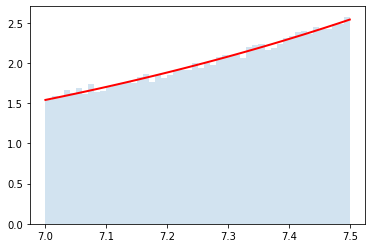

In [17]:
dist = distributions.Dist_ia1113()
rvs = dist.rvs(n_samples)
counts, bins, edges = plt.hist(rvs, bins=50, density=True, alpha =0.2)
y = []
for bin in bins:
    y.append(dist.pdf(bin))
plt.plot(bins, y, c='r', lw=2)

In [18]:
dist.std()

0.14344336861632886

Dist_kc90: std from samples = 0.71, std from dist = 0.71
Dist_knd286: std from samples = 0.31, std from dist = 0.31
Dist_lac683: std from samples = 0.58, std from dist = 0.54
Dist_phh250: std from samples = 0.24, std from dist = 0.24
Dist_pw1091: std from samples = 0.88, std from dist = 0.89
Dist_sm6779: std from samples = 0.28, std from dist = 0.28
Dist_rdm445: std from samples = 0.71, std from dist = 0.71
Dist_ia1113: std from samples = 0.14, std from dist = 0.14


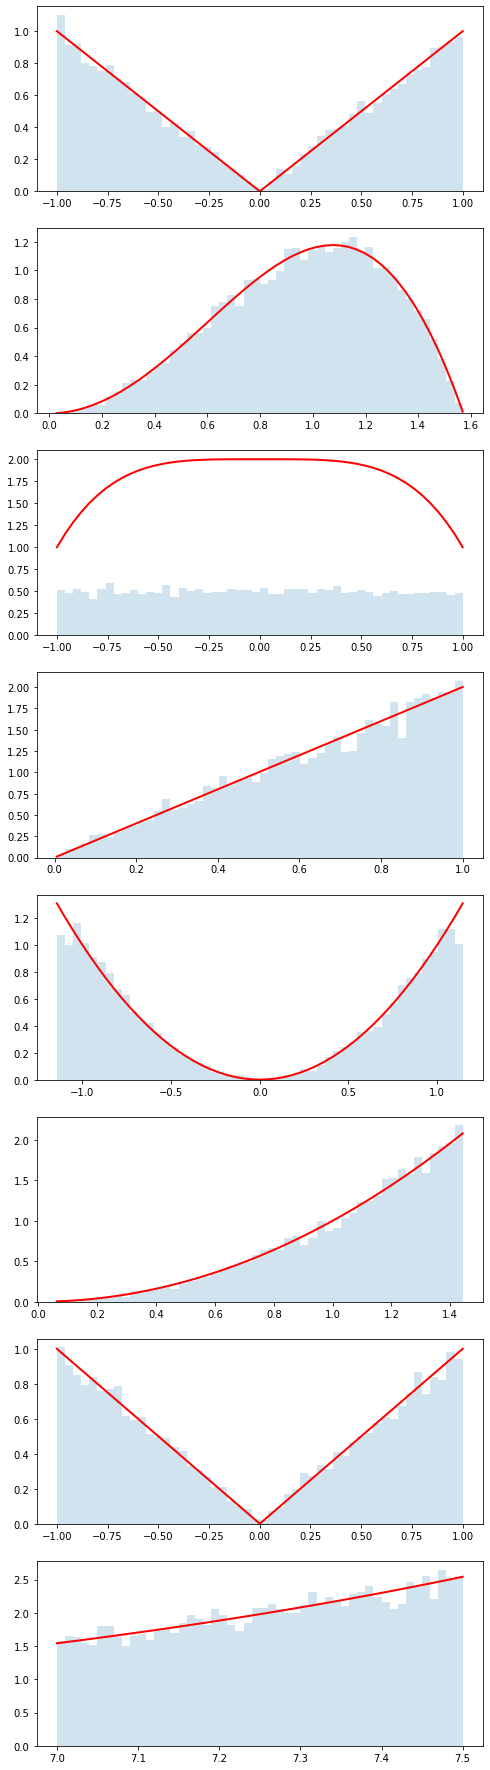

In [19]:
fig = plt.figure(figsize=2*plt.figaspect(len(ok_distributions_list)))
for i, cls in enumerate(ok_distributions_list):
    dist = cls()
    rvs = dist.rvs(10000)
    ax = fig.add_subplot(len(ok_distributions_list),1,i+1)
    counts, bins, patches = ax.hist(rvs, bins=50, density=True, alpha=0.2)
    # depending on how you code up your pdf() function, numpy might not
    # be able to "broadcast" (apply the function for each element of a numpy array)
    # but this should always wrok
    y = []
    for bin in bins:
        y.append(dist.pdf(bin))
        
    # ok, now plot it
    plt.plot(bins, y, c='r', lw=2)
    
    # and let's check if the distribution is ok
    print("%s: std from samples = %.2f, std from dist = %.2f" %(cls.__name__,np.std(dist.rvs(n_samples)), dist.std()))
    if np.abs(np.std(dist.rvs(n_samples)) - dist.std()) / dist.std() > 0.1:
        print("looks like a problem with this distribution: ", cls)

Dist_ap5312: std from samples = 0.18, std from dist = 0.16
Dist_cas955: std from samples = 0.23, std from dist = 5.89
looks like a problem with this distribution:  <class 'distributions.Dist_cas955.Dist_cas955'>
Dist_fay221: std from samples = 0.29, std from dist = 0.32
Dist_fh828: std from samples = 0.22, std from dist = 0.18
looks like a problem with this distribution:  <class 'distributions.Dist_fh828.Dist_fh828'>
Dist_jam1535: std from samples = 0.84, std from dist = 0.84
Dist_jnt299: std from samples = 0.04, std from dist = 0.00
looks like a problem with this distribution:  <class 'distributions.Dist_jnt299.Dist_jnt299'>
Dist_lwp226: std from samples = 0.12, std from dist = 0.85
looks like a problem with this distribution:  <class 'distributions.Dist_lwp226.Dist_lwp226'>
Dist_mm7253: std from samples = 0.27, std from dist = 0.27


ValueError: num must be 1 <= num <= 8, not 9

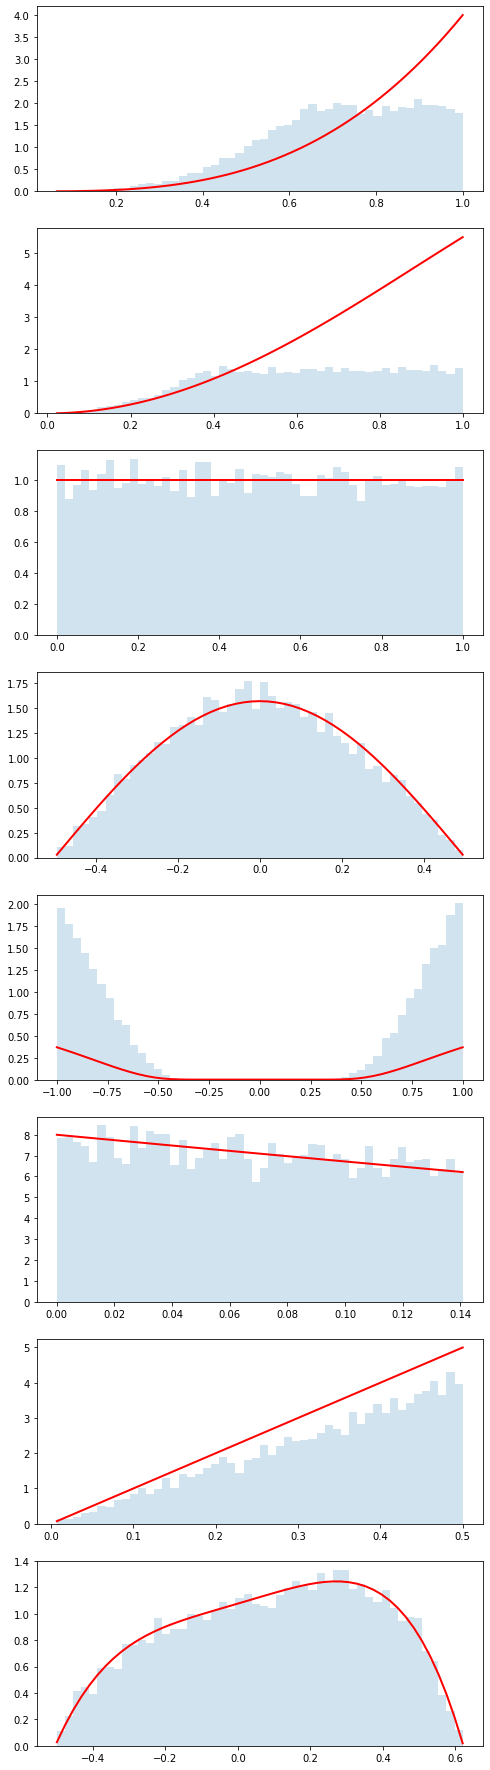

In [20]:
fig = plt.figure(figsize=2*plt.figaspect(len(problems)))
for i, cls in enumerate(problems):
    dist = cls()
    rvs = dist.rvs(10000)
    ax = fig.add_subplot(len(ok_distributions_list),1,i+1)
    counts, bins, patches = ax.hist(rvs, bins=50, density=True, alpha=0.2)
    # depending on how you code up your pdf() function, numpy might not
    # be able to "broadcast" (apply the function for each element of a numpy array)
    # but this should always wrok
    y = []
    for bin in bins:
        y.append(dist.pdf(bin))
        
    # ok, now plot it
    plt.plot(bins, y, c='r', lw=2)
    
    # and let's check if the distribution is ok
    print("%s: std from samples = %.2f, std from dist = %.2f" %(cls.__name__,np.std(dist.rvs(n_samples)), dist.std()))
    if np.abs(np.std(dist.rvs(n_samples)) - dist.std()) / dist.std() > 0.1:
        print("looks like a problem with this distribution: ", cls)


In [21]:
def do_convolution(dist, N):
    n_samples = 10000
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for i in range(N):
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )


    counts, bins, patches = plt.hist(q,bins=50, density=True, alpha=.2)
    plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')

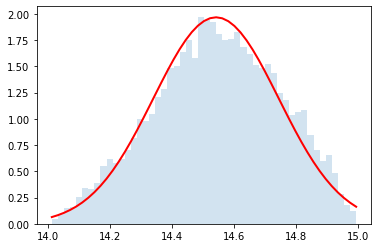

In [22]:
dist = distributions.Dist_ia1113()  #update me!
do_convolution(dist,2)

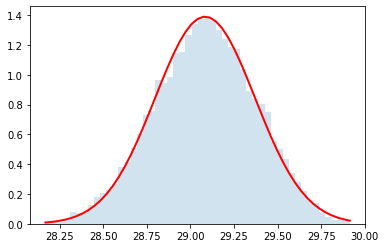

In [23]:
do_convolution(dist,4)

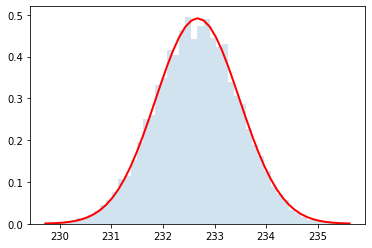

In [24]:
do_convolution(dist,32)

In [25]:
np.random.choice(['a','b','c','d'], 10)

array(['d', 'c', 'c', 'a', 'a', 'b', 'd', 'd', 'd', 'b'], dtype='<U1')

In [26]:
def do_random_convolution(list_of_distributions, N):
    n_samples = 10000
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for dist_class in np.random.choice(list_of_distributions,N):
        dist = dist_class()
        print(dist_class.__name__, dist.std())
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )


    counts, bins, patches = plt.hist(q,bins=50, density=True, alpha=.2)
    plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')

Dist_rdm445 0.7071067811865476
Dist_sm6779 0.27929


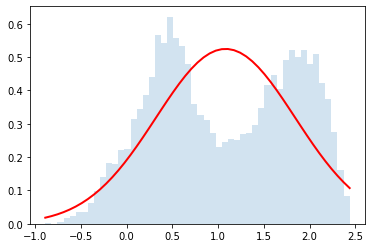

In [27]:
do_random_convolution(ok_distributions_list,2)

Dist_phh250 0.23570226039551584
Dist_ia1113 0.14344336861632886
Dist_kc90 0.7071067811865476
Dist_knd286 0.3070547093925828


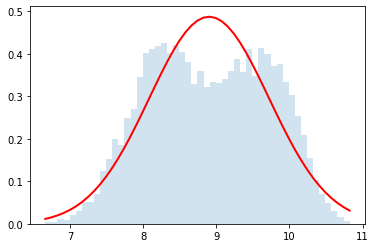

In [28]:
do_random_convolution(ok_distributions_list,4)

Dist_pw1091 0.88669
Dist_kc90 0.7071067811865476
Dist_sm6779 0.27929
Dist_phh250 0.23570226039551584
Dist_ia1113 0.14344336861632886
Dist_rdm445 0.7071067811865476
Dist_knd286 0.3070547093925828
Dist_sm6779 0.27929
Dist_knd286 0.3070547093925828
Dist_knd286 0.3070547093925828
Dist_knd286 0.3070547093925828
Dist_ia1113 0.14344336861632886
Dist_rdm445 0.7071067811865476
Dist_kc90 0.7071067811865476
Dist_kc90 0.7071067811865476
Dist_pw1091 0.88669
Dist_knd286 0.3070547093925828
Dist_lac683 0.5394490624751247
Dist_ia1113 0.14344336861632886
Dist_kc90 0.7071067811865476
Dist_phh250 0.23570226039551584
Dist_sm6779 0.27929
Dist_knd286 0.3070547093925828
Dist_lac683 0.5394490624751247
Dist_rdm445 0.7071067811865476
Dist_phh250 0.23570226039551584
Dist_ia1113 0.14344336861632886
Dist_rdm445 0.7071067811865476
Dist_knd286 0.3070547093925828
Dist_ia1113 0.14344336861632886
Dist_knd286 0.3070547093925828
Dist_knd286 0.3070547093925828


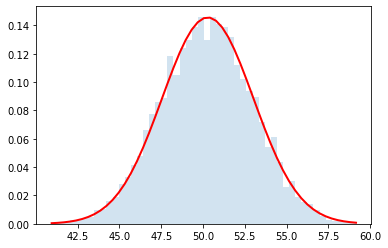

In [29]:
do_random_convolution(ok_distributions_list,32)

In [30]:
date.today()

datetime.date(2020, 5, 10)